In [41]:
import pandas as pd
import streamlit as st
import plotly.express as px


In [7]:
df = pd.read_csv('vehicles_us.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [11]:
df.fillna("Unknown", inplace=True)

In [12]:
df.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [13]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,Unknown,1.0,2018-06-23,19
1,25500,Unknown,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,Unknown,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,Unknown,automatic,pickup,Unknown,Unknown,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,Unknown,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,Unknown,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,Unknown,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,Unknown,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [16]:
print(df.columns)

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')


In [18]:
print(df['model'].unique())

['bmw x5' 'ford f-150' 'hyundai sonata' 'chrysler 200' 'chrysler 300'
 'toyota camry' 'honda pilot' 'kia sorento' 'chevrolet silverado 1500'
 'honda accord' 'ram 1500' 'gmc yukon' 'jeep cherokee'
 'chevrolet traverse' 'hyundai elantra' 'chevrolet tahoe' 'toyota rav4'
 'chevrolet silverado' 'jeep wrangler' 'chevrolet malibu' 'ford fusion se'
 'chevrolet impala' 'chevrolet corvette' 'jeep liberty' 'toyota camry le'
 'nissan altima' 'subaru outback' 'toyota highlander' 'dodge charger'
 'toyota tacoma' 'chevrolet equinox' 'nissan rogue'
 'mercedes-benz benze sprinter 2500' 'honda cr-v' 'jeep grand cherokee'
 'toyota 4runner' 'ford focus' 'honda civic' 'kia soul'
 'chevrolet colorado' 'ford f150 supercrew cab xlt'
 'chevrolet camaro lt coupe 2d' 'chevrolet cruze' 'ford mustang'
 'chevrolet silverado 3500hd' 'nissan frontier crew cab sv'
 'subaru impreza' 'jeep grand cherokee laredo' 'nissan versa'
 'ford f-250 sd' 'chevrolet silverado 1500 crew' 'ford f250 super duty'
 'chevrolet camaro' 'f

In [24]:
print(df['paint_color'].unique())

['Unknown' 'white' 'red' 'black' 'blue' 'grey' 'silver' 'custom' 'orange'
 'yellow' 'brown' 'green' 'purple']


In [25]:
print(df['type'].unique())

['SUV' 'pickup' 'sedan' 'truck' 'coupe' 'van' 'convertible' 'hatchback'
 'wagon' 'mini-van' 'other' 'offroad' 'bus']


In [28]:
display(df['price'].unique().sum())

65312513

In [37]:
average_price_by_model = df.groupby('model')['price'].mean()

# Display the result
print(average_price_by_model)

model
acura tl              6474.500000
bmw x5               10695.891386
buick enclave        11439.612546
cadillac escalade    17032.059006
chevrolet camaro     13284.961353
                         ...     
toyota sienna         9046.838906
toyota tacoma        15473.817412
toyota tundra        14715.633499
volkswagen jetta      6426.240848
volkswagen passat     8489.905714
Name: price, Length: 100, dtype: float64


<Axes: title={'center': 'Price Distribution'}, xlabel='Price', ylabel='Frequency'>

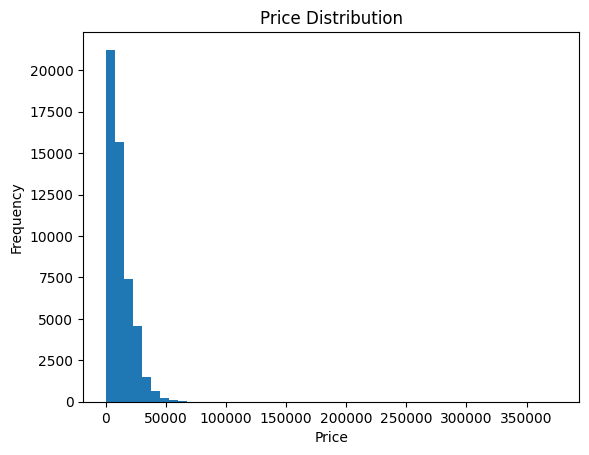

In [47]:
import matplotlib.pyplot as plt
df['price'].plot(kind='hist', bins=50, title='Price Distribution', xlabel='Price', ylabel='Frequency')


<Axes: title={'center': 'Model Year Distribution'}, xlabel='model_year'>

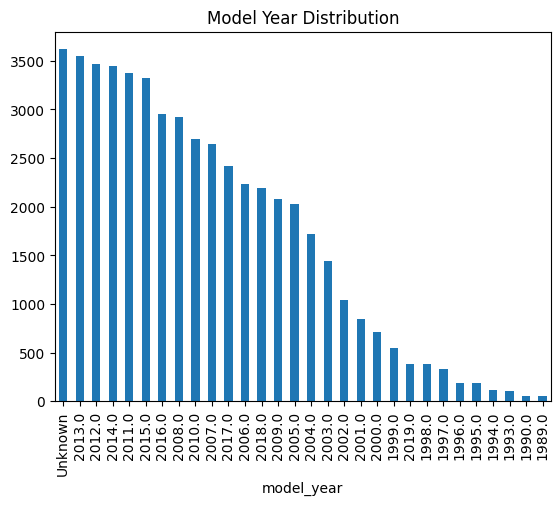

In [53]:
df['model_year'].value_counts().head(30).plot(kind='bar', title='Model Year Distribution')


<Axes: title={'center': 'Condition Breakdown'}, xlabel='condition'>

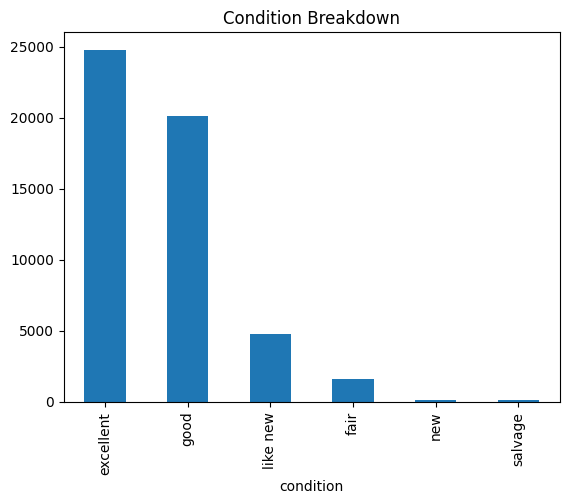

In [55]:
df['condition'].value_counts().plot(kind='bar', title='Condition Breakdown')


<Axes: title={'center': 'Paint Color Distribution'}, xlabel='paint_color'>

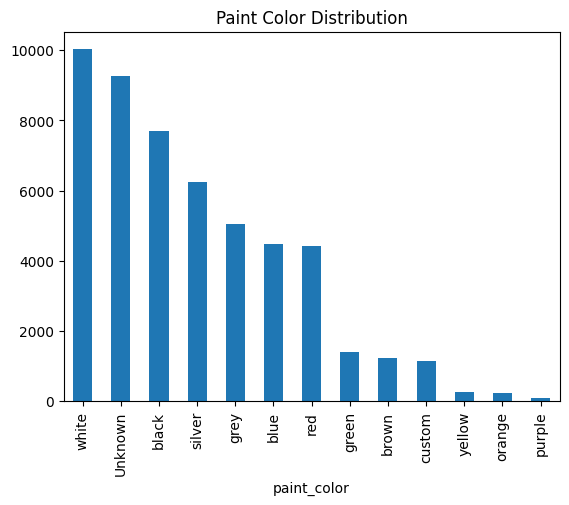

In [56]:
df['paint_color'].value_counts().plot(kind='bar', title='Paint Color Distribution')


<Axes: title={'center': 'Price vs Odometer'}, xlabel='odometer', ylabel='price'>

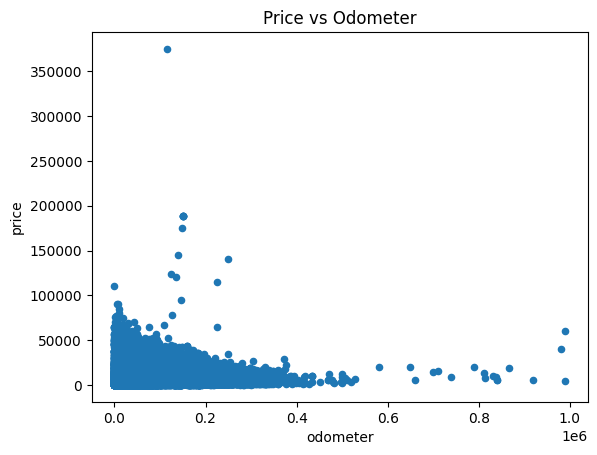

In [58]:
# Convert columns to numeric, coercing errors to NaN
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows with NaN
df = df.dropna(subset=['odometer', 'price'])

# Plot
df.plot.scatter(x='odometer', y='price', title='Price vs Odometer')


<Axes: title={'center': 'Average Price by Condition'}, xlabel='condition', ylabel='Average price'>

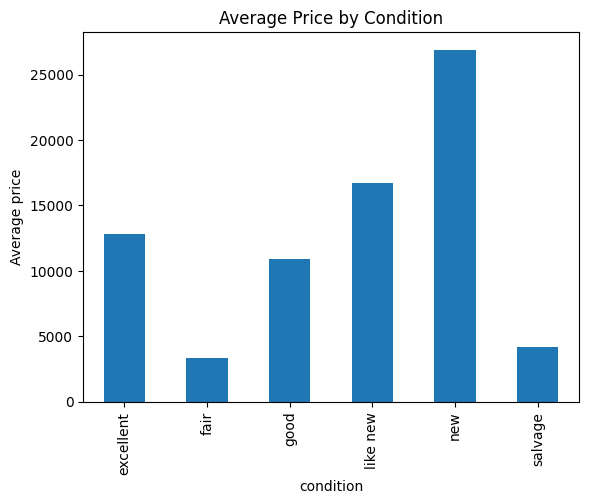

In [60]:
df.groupby('condition')['price'].mean().plot(kind='bar', ylabel='Average price', title='Average Price by Condition')


<Axes: title={'center': 'Average Price by Fuel Type'}, xlabel='fuel'>

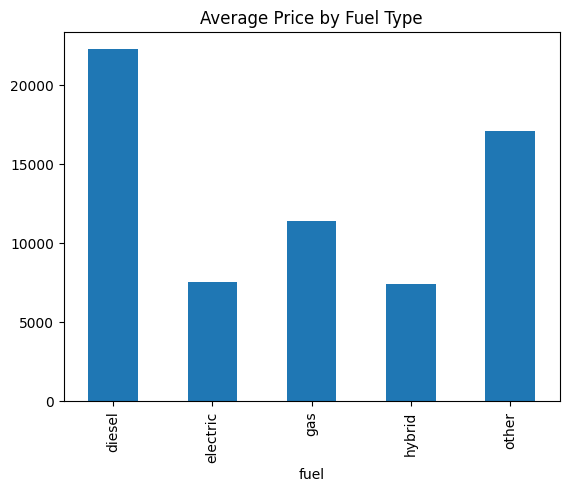

In [61]:
df.groupby('fuel')['price'].mean().plot(kind='bar', title='Average Price by Fuel Type')


<Axes: title={'center': 'Paint Color by Type'}, xlabel='paint_color'>

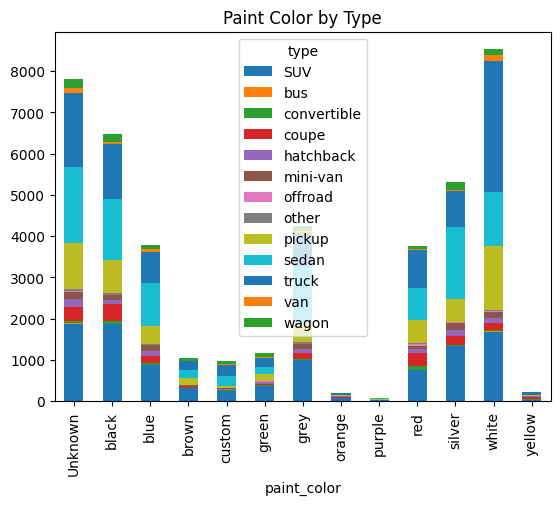

In [62]:
pd.crosstab(df['paint_color'], df['type']).plot(kind='bar', stacked=True, title='Paint Color by Type')


C:\Users\User\AppData\Local\Temp\ipykernel_5824\1182475131.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: title={'center': 'Average Price by Month'}, xlabel='date_posted'>

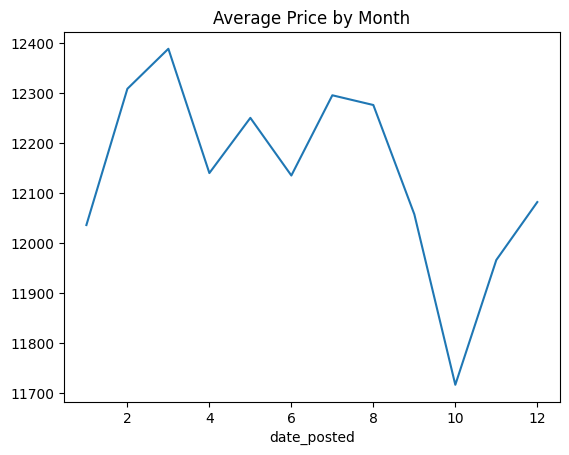

In [64]:
df['date_posted'] = pd.to_datetime(df['date_posted'])
df.groupby(df['date_posted'].dt.month)['price'].mean().plot(title='Average Price by Month')



We can see a significant decrease in price for cars posted for 10 months. As we are unsure of the condition we can't make any immediate conclusions as to if that's the best car to purchase.